# Analise de Distribuição

In [1]:
# Importando as bibliotecas nescessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Carregando o banco de dados
df = pd.read_csv("../data/fitness_gym.csv")

In [3]:
# Exibindo amostra dos dados
df.sample(10)

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
176,CHECK_0177,2023-11-20,18:19:00,MEMBER_0028,35,M,Premium,Spinning,25,277,Cardio,22,4,False,NaN
153,CHECK_0154,2023-10-04,08:07:00,MEMBER_0087,62,M,VIP,Musculação,41,210,Força,28,4,False,NaN
196,CHECK_0197,2023-12-27,11:47:00,MEMBER_0024,55,M,VIP,Zumba,63,360,Dança,17,4,False,NaN
106,CHECK_0107,2023-07-20,17:55:00,MEMBER_0002,55,M,Premium,Musculação,77,396,Força,17,4,False,NaN
162,CHECK_0163,2023-10-21,17:17:00,MEMBER_0082,25,F,Basic,Jump,47,376,Cardio,18,5,True,Outros
103,CHECK_0104,2023-07-15,13:52:00,MEMBER_0068,56,F,Premium,Zumba,60,309,Dança,16,4,False,NaN
173,CHECK_0174,2023-11-10,19:44:00,MEMBER_0006,24,F,Basic,CrossFit,59,584,Funcional,8,4,False,NaN
164,CHECK_0166,2023-10-29,17:57:00,MEMBER_0057,60,F,Premium,Yoga,43,139,Bem-estar,10,4,False,NaN
16,CHECK_0017,2023-02-04,18:20:00,MEMBER_0086,50,M,Basic,Yoga,48,192,Bem-estar,12,3,False,NaN
85,CHECK_0085,2023-06-05,17:35:00,MEMBER_0040,52,F,Basic,Pilates,54,218,Bem-estar,14,4,False,NaN


In [4]:
# informações sobre o banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   check_in_id          200 non-null    object
 1   date                 200 non-null    object
 2   time                 200 non-null    object
 3   member_id            200 non-null    object
 4   age                  200 non-null    int64 
 5   gender               200 non-null    object
 6   membership_type      200 non-null    object
 7   activity             200 non-null    object
 8   duration_minutes     200 non-null    int64 
 9   calories_burned      200 non-null    int64 
 10  activity_category    200 non-null    object
 11  attendance_streak    200 non-null    int64 
 12  satisfaction_score   200 non-null    int64 
 13  cancelled            200 non-null    bool  
 14  cancellation_reason  20 non-null     object
dtypes: bool(1), int64(5), object(9)
memory usage: 22.2+ KB


In [5]:
# Descrição superficial dos dados
df.describe()

,age,duration_minutes,calories_burned,attendance_streak,satisfaction_score
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,42.485000,56.720000,356.055000,13.340000,4.04500
std,13.730711,13.061955,149.449381,6.031275,0.58711
min,18.000000,24.000000,106.000000,1.000000,3.00000
25%,30.000000,47.000000,245.750000,9.000000,4.00000
50%,42.000000,57.000000,328.000000,13.000000,4.00000
75%,56.000000,64.000000,442.000000,18.000000,4.00000
max,64.000000,94.000000,910.000000,28.000000,5.00000


### Acima notamos:

Tempo médio de treino:  1 hora

Média de calórias queimadas por treino: 356 calorias

Média das idade: 42 anos

Idade mínima encontrada: 18 anos

Idade Máxima  encontrada: 64 anos

*********************************

### Gráfico de distribuição das atividades na academia

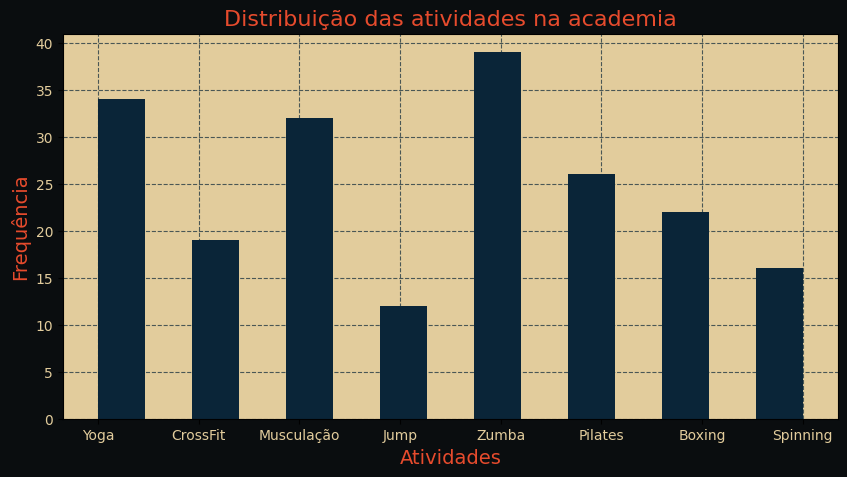

In [6]:
# Seleciona a coluna activity do dataframe df, que contém informações sobre os tipos de atividades praticadas na academia.
activity = df["activity"]

# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")

# Criando um histograma com as atividades praticadas na academia.
plt.hist(activity, color="#0A2538", bins=15)

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")


# Adiciona e personaliza a grade do gráfico.
plt.grid(
    True,
    color="#0A2538",
    linestyle="--",
    alpha=0.7,
)

# Adicionando um título ao gráfico, definindo a cor do título e o tamanho do título.
plt.title(
    "Distribuição das atividades na academia",
    fontsize=16,
    color="#E64B2D",
)

# Labels e ticks.
plt.xlabel(
    "Atividades", fontsize=14, color="#E64B2D"
)
plt.ylabel(
    "Frequência", fontsize=14, color="#E64B2D"
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Apresenta o gráfico.
plt.show()

[]

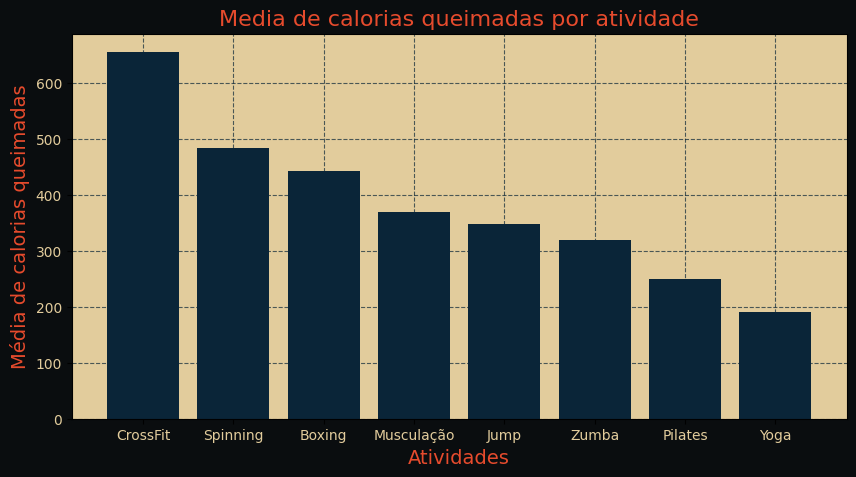

In [7]:
# Agrupa a coluna activity com uma coluna formada pela média de calorias queimadas em cada atividade
calorias_atividade = (
    df.groupby("activity")["calories_burned"]
    .mean()
    .reset_index()
)

# Ordena a coluna pela média de calorias queimadas em ordem decrescente
calorias_atividade.sort_values(
    by="calories_burned",
    ascending=False,
    inplace=True,
)

# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")
# Cria um gráfico de barras com a média de calorias queimadas por atividade na academia.
plt.bar(
    x=calorias_atividade["activity"],
    height=calorias_atividade["calories_burned"],
    color="#0A2538",
)

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")

# Adicionando e estilizando a grade
plt.grid(
    True,
    color="#0A2538",
    linestyle="--",
    alpha=0.7,
)

# Adicionando um título ao gráfico, definindo a cor do título e o tamanho do título.
plt.title(
    "Media de calorias queimadas por atividade",
    fontsize=16,
    color="#E64B2D",
)

# Labels e ticks.
plt.xlabel(
    "Atividades", fontsize=14, color="#E64B2D"
)
plt.ylabel(
    "Média de calorias queimadas",
    fontsize=14,
    color="#E64B2D",
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Mostra o gráfico.
plt.plot()

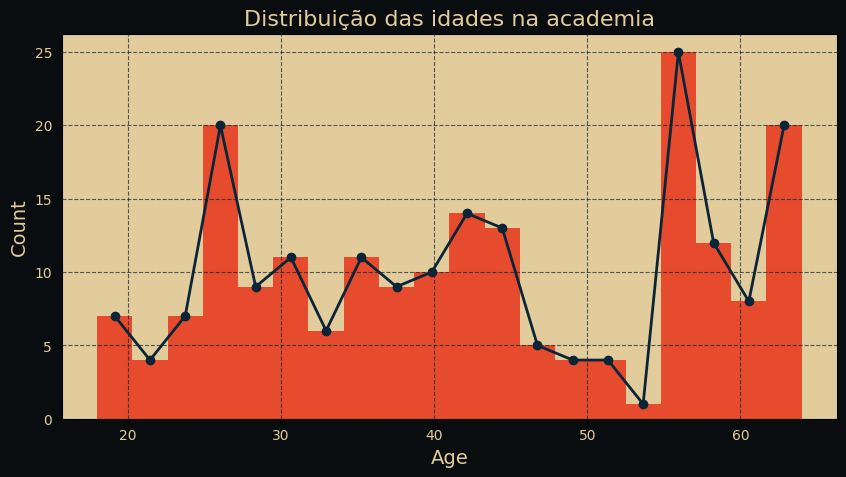

In [8]:
# Pegando as idades
ages = df["age"]


# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")

# Criando um histograma com as idades
plt.hist(ages, bins=20, color="#E64B2D")

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")

# Adicionando e estilizando a grade
plt.grid(
    True,
    color="#0A2538",
    alpha=0.7,
    linestyle="--",
)

# Adicionando um título ao gráfico, definindo a cor do título e o tamanho do título.
plt.title(
    "Distribuição das idades na academia",
    color="#E2CC9C",
    fontsize=16,
)

# Labels e ticks.
plt.xlabel("Age", color="#E2CC9C", fontsize=14)
plt.ylabel("Count", color="#E2CC9C", fontsize=14)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)


# Criando um gráfico em linha
age_counts, bin_edges = np.histogram(
    ages, bins=20
)
bin_centers = 0.5 * (
    bin_edges[:-1] + bin_edges[1:]
)
plt.plot(
    bin_centers,
    age_counts,
    color="#0A2538",
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Linha",
)
plt.show()

In [9]:
# Agrupa a coluna 'activity' contando o número de cancelamentos
Cancel_activity = (
    df.groupby("activity")["cancelled"]
    .count()
    .reset_index()
)

In [10]:
# Ordena o dataframe pelo número de cancelamentos em ordem decrescente
Cancel_activity.sort_values(
    by="cancelled", ascending=False, inplace=True
)

In [11]:
Cancel_activity

,activity,cancelled
7,Zumba,39
6,Yoga,34
3,Musculação,32
4,Pilates,26
0,Boxing,22
1,CrossFit,19
5,Spinning,16
2,Jump,12


<BarContainer object of 8 artists>

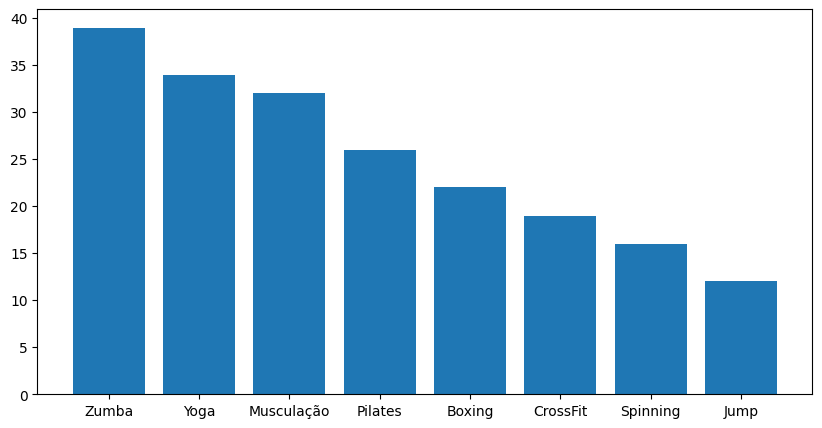

In [12]:
# Cria um gráfico de barras com o número de cancelamentos por atividade
plt.figure(figsize=(10, 5))
plt.bar(
    x=Cancel_activity["activity"],
    height=Cancel_activity["cancelled"],
)

In [13]:
# Agrupa a coluna 'activity_category' calculando a média de idade
df_activity_category_age = (
    df.groupby("activity_category")["age"]
    .mean()
    .reset_index()
)
df_activity_category_age.sort_values(
    by="age", ascending=False, inplace=True
)

In [14]:
df_activity_category_age

,activity_category,age
3,Força,49.500000
0,Bem-estar,47.783333
2,Dança,45.307692
1,Cardio,34.392857
4,Funcional,32.263158
5,Luta,31.954545


In [15]:
# Agrupa a coluna 'activity_category' calculando a média de satisfação
df_activity_category_satisfaction_score = (
    df.groupby("activity_category")[
        "satisfaction_score"
    ]
    .mean()
    .reset_index()
)
df_activity_category_satisfaction_score.sort_values(
    by="satisfaction_score",
    ascending=False,
    inplace=True,
)

<BarContainer object of 6 artists>

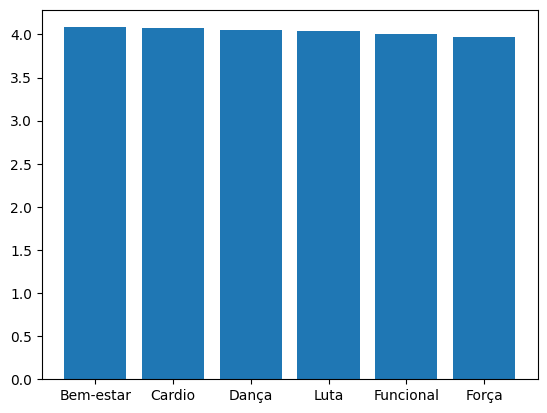

In [16]:
# Cria um gráfico de barras com a média de satisfação por categoria de atividade
plt.bar(
    x=df_activity_category_satisfaction_score[
        "activity_category"
    ],
    height=df_activity_category_satisfaction_score[
        "satisfaction_score"
    ],
)

In [17]:
df["satisfaction_score"].mean()

np.float64(4.045)

In [18]:
colors = [
    "#0A2538",
    "#BF5B32",
    "#E84A2E",
    "#E2CC9C",
]

/tmp/ipykernel_56365/2941592196.py:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


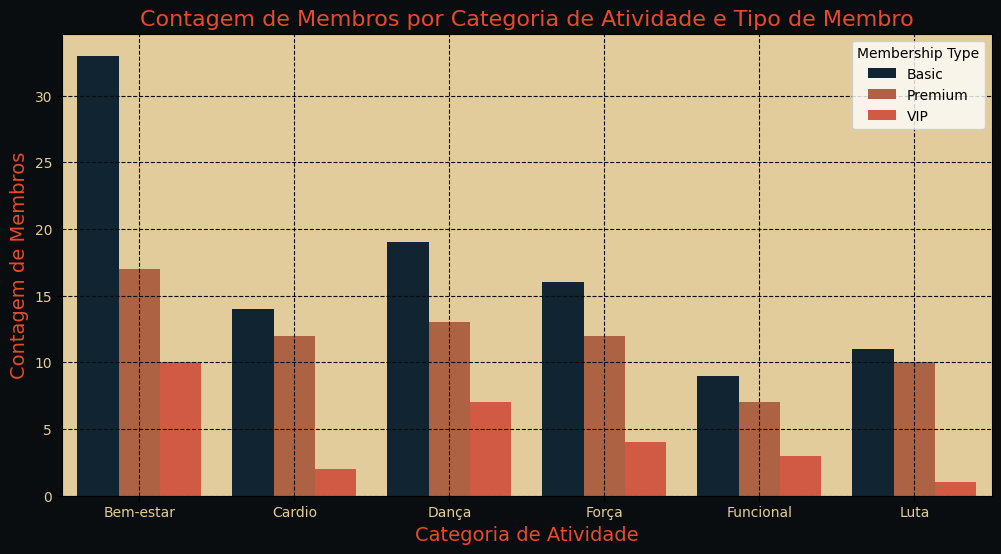

In [19]:
# Agrupa a coluna 'activity_category' e 'membership_type' contando o número de membros
df_activity_category_membership_type = (
    df.groupby(
        ["activity_category", "membership_type"]
    )["membership_type"]
    .count()
    .reset_index(name="membership_count")
)
# Cria um gráfico de barras com a contagem de membros por categoria de atividade e tipo de associação
plt.figure(figsize=(12, 6), facecolor="#0A0D0F")
sns.barplot(
    data=df_activity_category_membership_type,
    x="activity_category",
    y="membership_count",
    hue="membership_type",
    palette=colors,
)

plt.grid(True, color="#0A0D0F", linestyle="--")

plt.gca().set_facecolor("#E2CC9C")

# Adiciona título e labels
plt.title(
    "Contagem de Membros por Categoria de Atividade e Tipo de Membro",
    color="#E84A2E",
    fontsize=16,
)
plt.xlabel(
    "Categoria de Atividade",
    color="#E84A2E",
    fontsize=14,
)
plt.ylabel(
    "Contagem de Membros",
    color="#E84A2E",
    fontsize=14,
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Exibe a legenda
plt.legend(title="Membership Type")
plt.show()

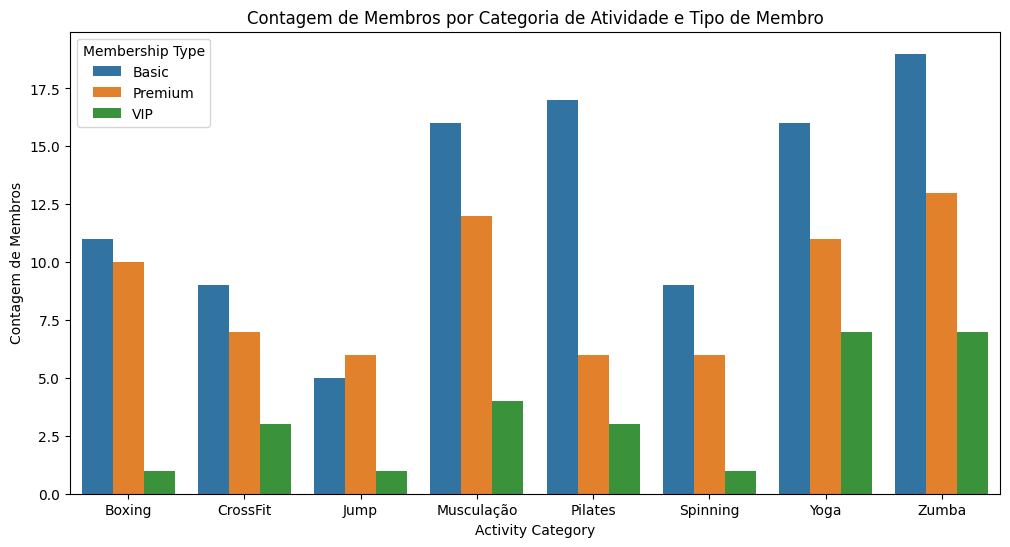

In [20]:
# Agrupa a coluna 'activity' e 'membership_type' contando o número de membros
df_activity_membership_type = (
    df.groupby(["activity", "membership_type"])[
        "membership_type"
    ]
    .count()
    .reset_index(name="membership_count")
)
# Cria um gráfico de barras com a contagem de membros por atividade e tipo de associação
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_activity_membership_type,
    x="activity",
    y="membership_count",
    hue="membership_type",
)

# Adiciona título e labels
plt.title(
    "Contagem de Membros por Categoria de Atividade e Tipo de Membro"
)
plt.xlabel("Activity Category")
plt.ylabel("Contagem de Membros")

# Exibe a legenda
plt.legend(title="Membership Type")
plt.show()